## Analysis in R - Part 1

Here I begin to explore my consolidated dataset, which contains ILI incidence, mean AQIs, and Google Search Trends for "Cough" and "Cold." 

I am in the process of learning R, so this notebook serves dual purposes: R practice and MPH Thesis EDA

In [1]:
library(dplyr)
library(tidyverse)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.1     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.1.8
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df <- read_csv('dataset.csv')

Rows: 140 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (4): 'Cough' Searches, Flu Cases, 'Cold' Searches, AQI
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(df)

Date,'Cough' Searches,Flu Cases,'Cold' Searches,AQI
<date>,<dbl>,<dbl>,<dbl>,<dbl>
2012-01-01,35,6609,39,40.58065
2012-02-01,35,7066,27,40.79310
2012-03-01,34,9728,29,42.58065
2012-04-01,34,4698,33,45.56667
2012-05-01,31,3449,17,59.77419
2012-06-01,30,2323,10,68.10000


In [4]:
colnames(df)

[1] "Date"             "'Cough' Searches" "Flu Cases"        "'Cold' Searches" 
[5] "AQI"

In [8]:
df <- rename(df, "cough_searches" = "'Cough' Searches",  "flu_cases" = "Flu Cases", "cold_searches" = "'Cold' Searches" , "mean_aqi" = "AQI" )

In [12]:
as.Date(df$Date[1])

[1] "2012-01-01"

In [14]:
d = df |> mutate(Date = as.Date(Date))

In [90]:
# Setting global plot dimensions. This is neccesary when plotting in Jupyter with R

options(repr.plot.width=15, repr.plot.height=8)

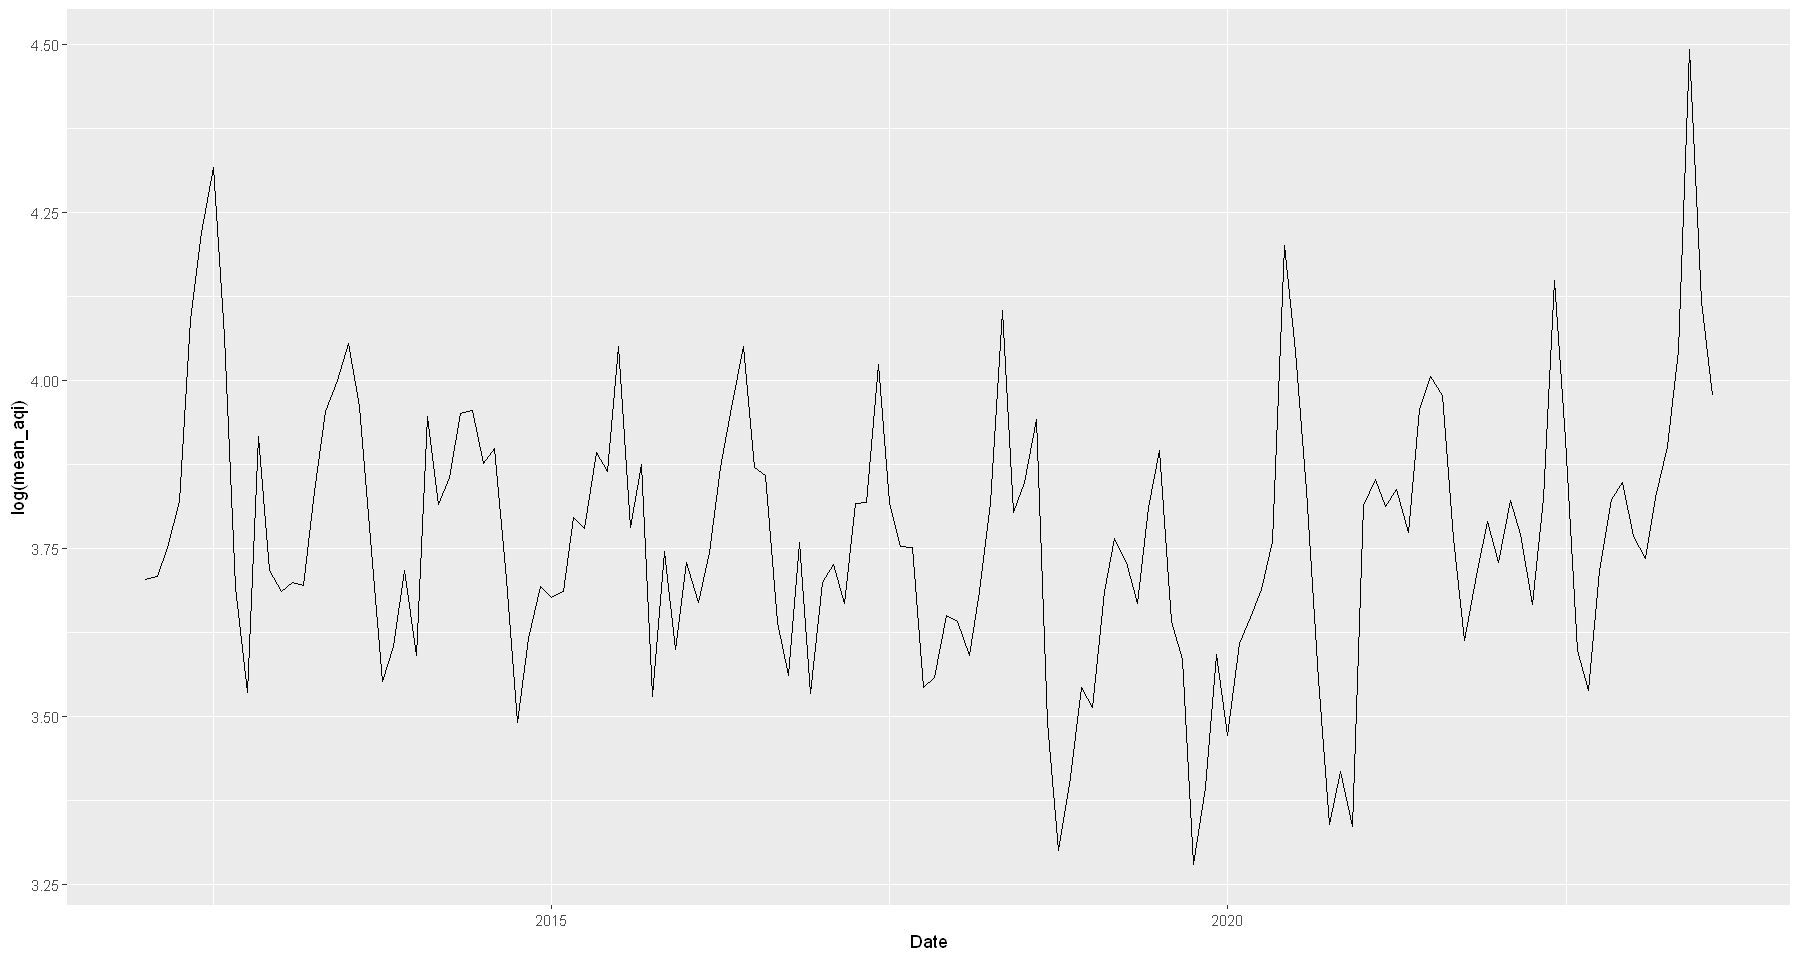

In [31]:
ggplot(d, aes(x=Date,y=log(mean_aqi))) + 
geom_line()

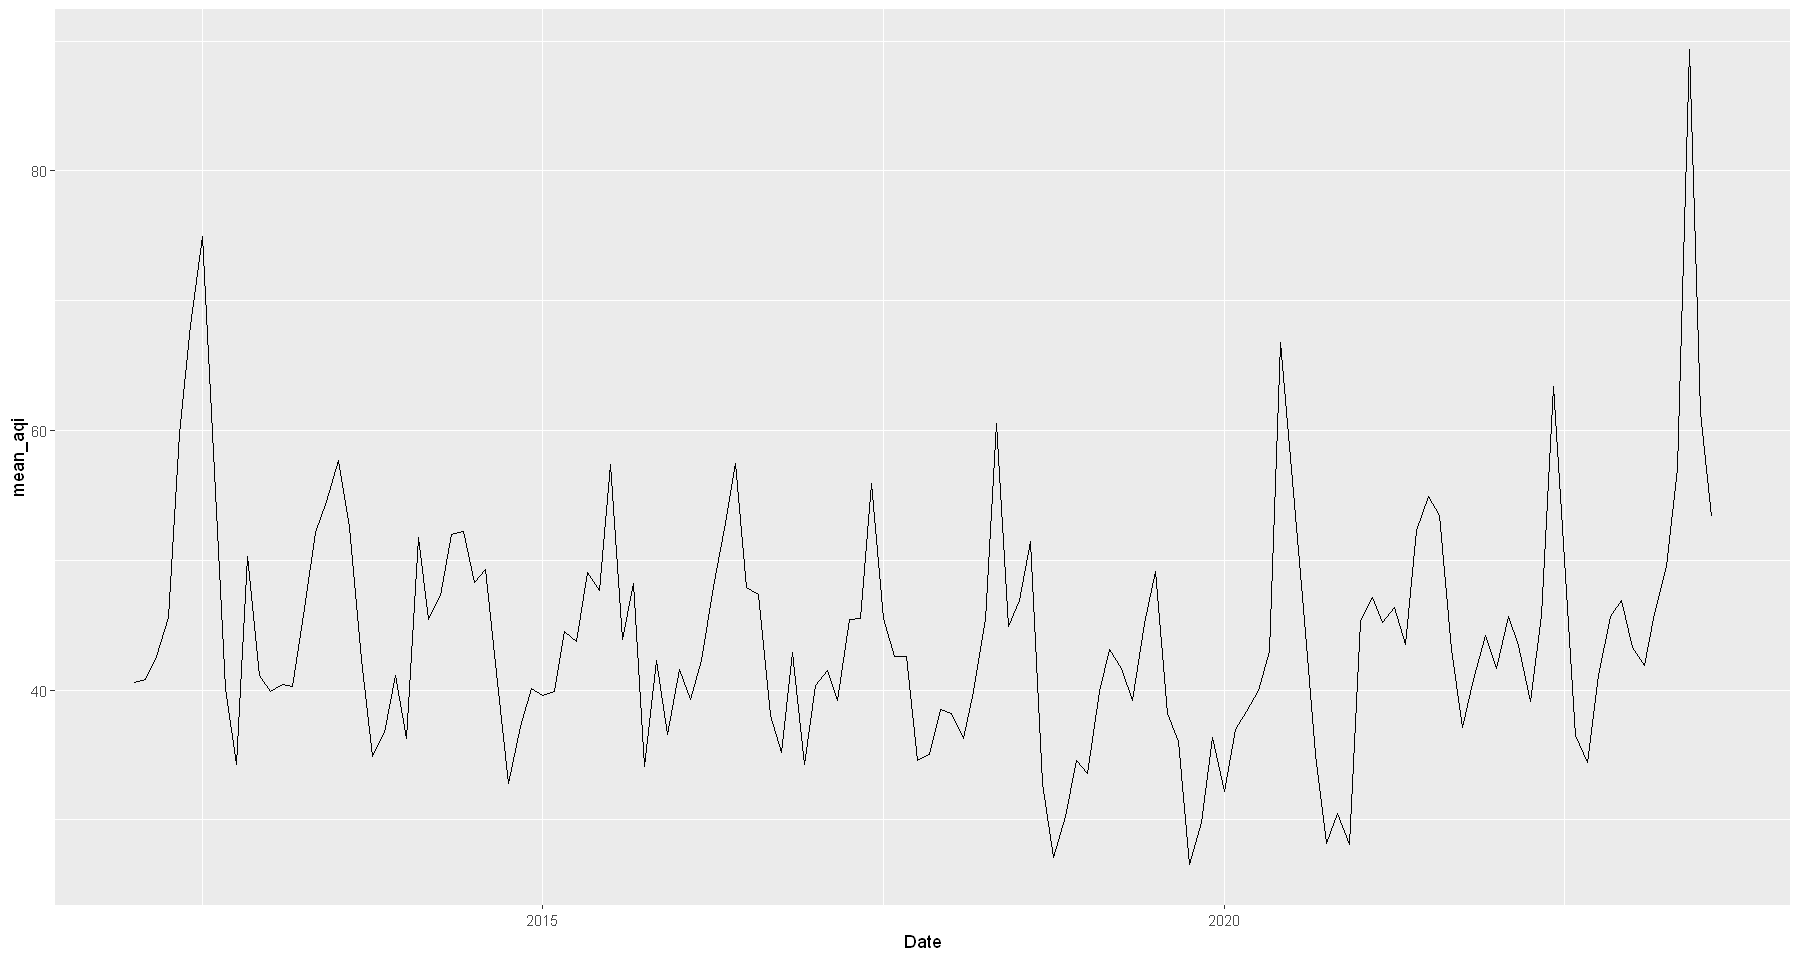

In [32]:
ggplot(d, aes(x=Date,y=mean_aqi)) + 
geom_line()

In [34]:
library("TTR")

Warning message:
"package 'TTR' was built under R version 4.2.3"


TTR includes a simple moving average function, called SMA. We can plot the 12-month SMA for each variable to better understand trends over time that are not associated with the seasons

Warning message:
"Removed 11 rows containing missing values (`geom_line()`)."


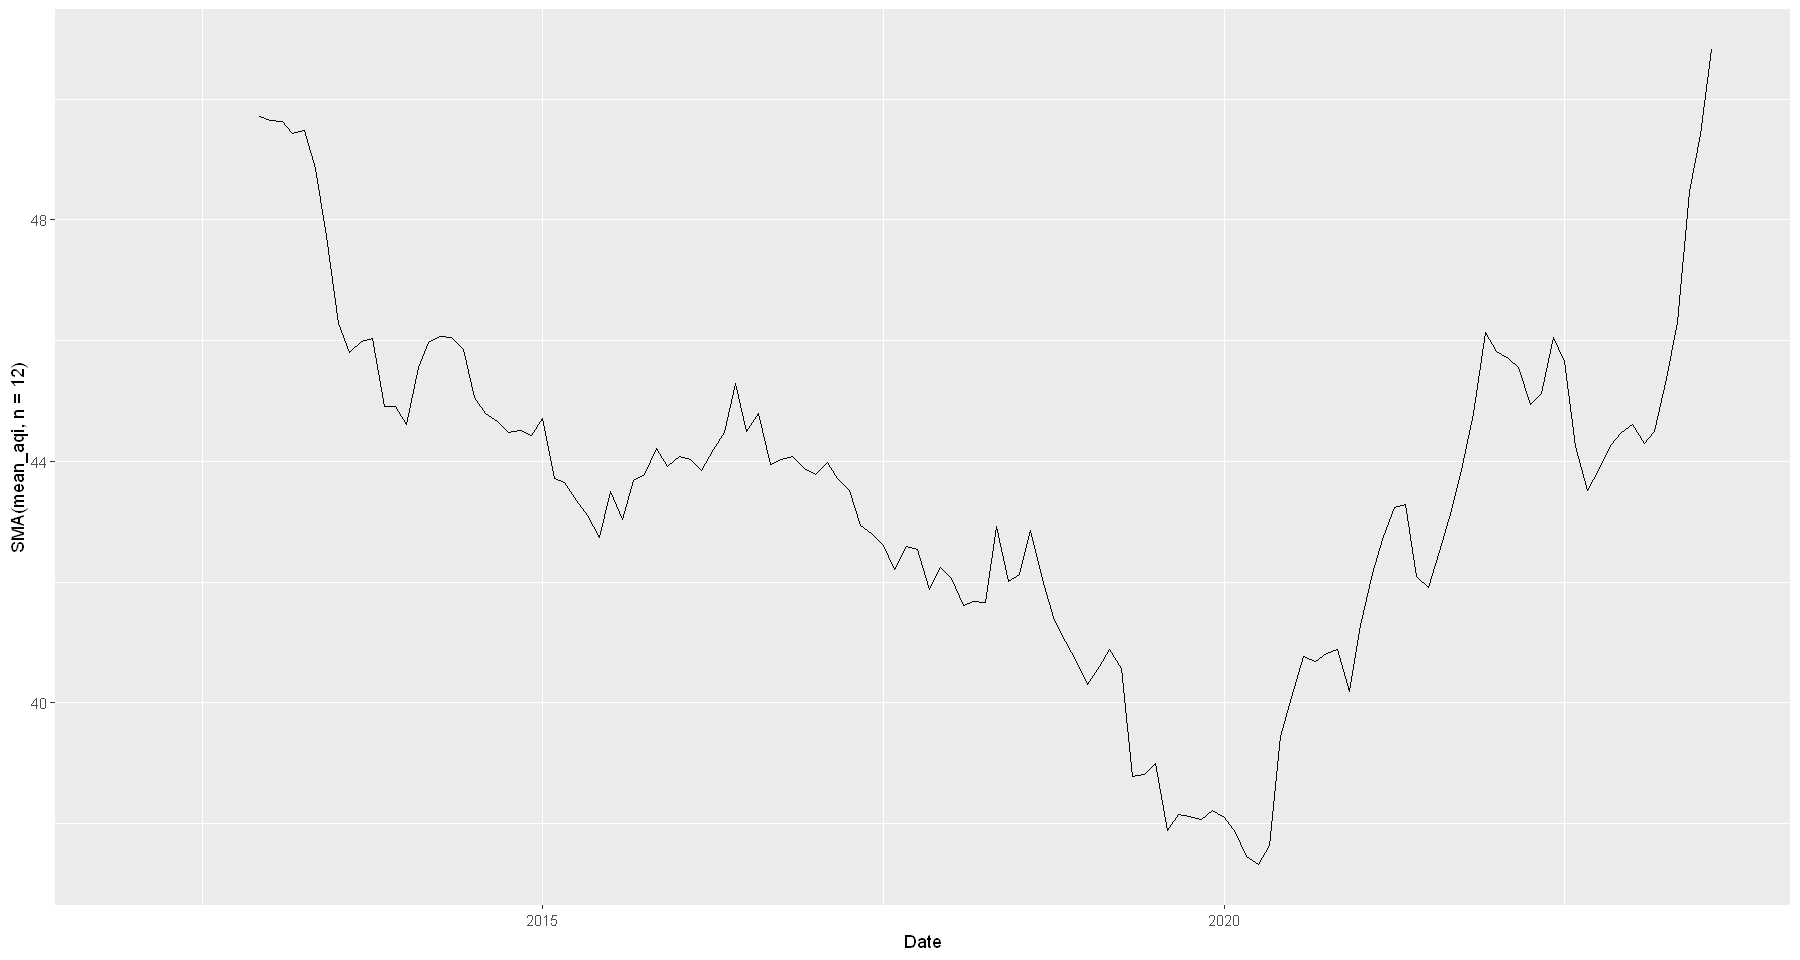

In [37]:
ggplot(d,aes(x=Date,y=SMA(mean_aqi,n=12))) + geom_line()

Warning message:
"Removed 11 rows containing missing values (`geom_line()`)."


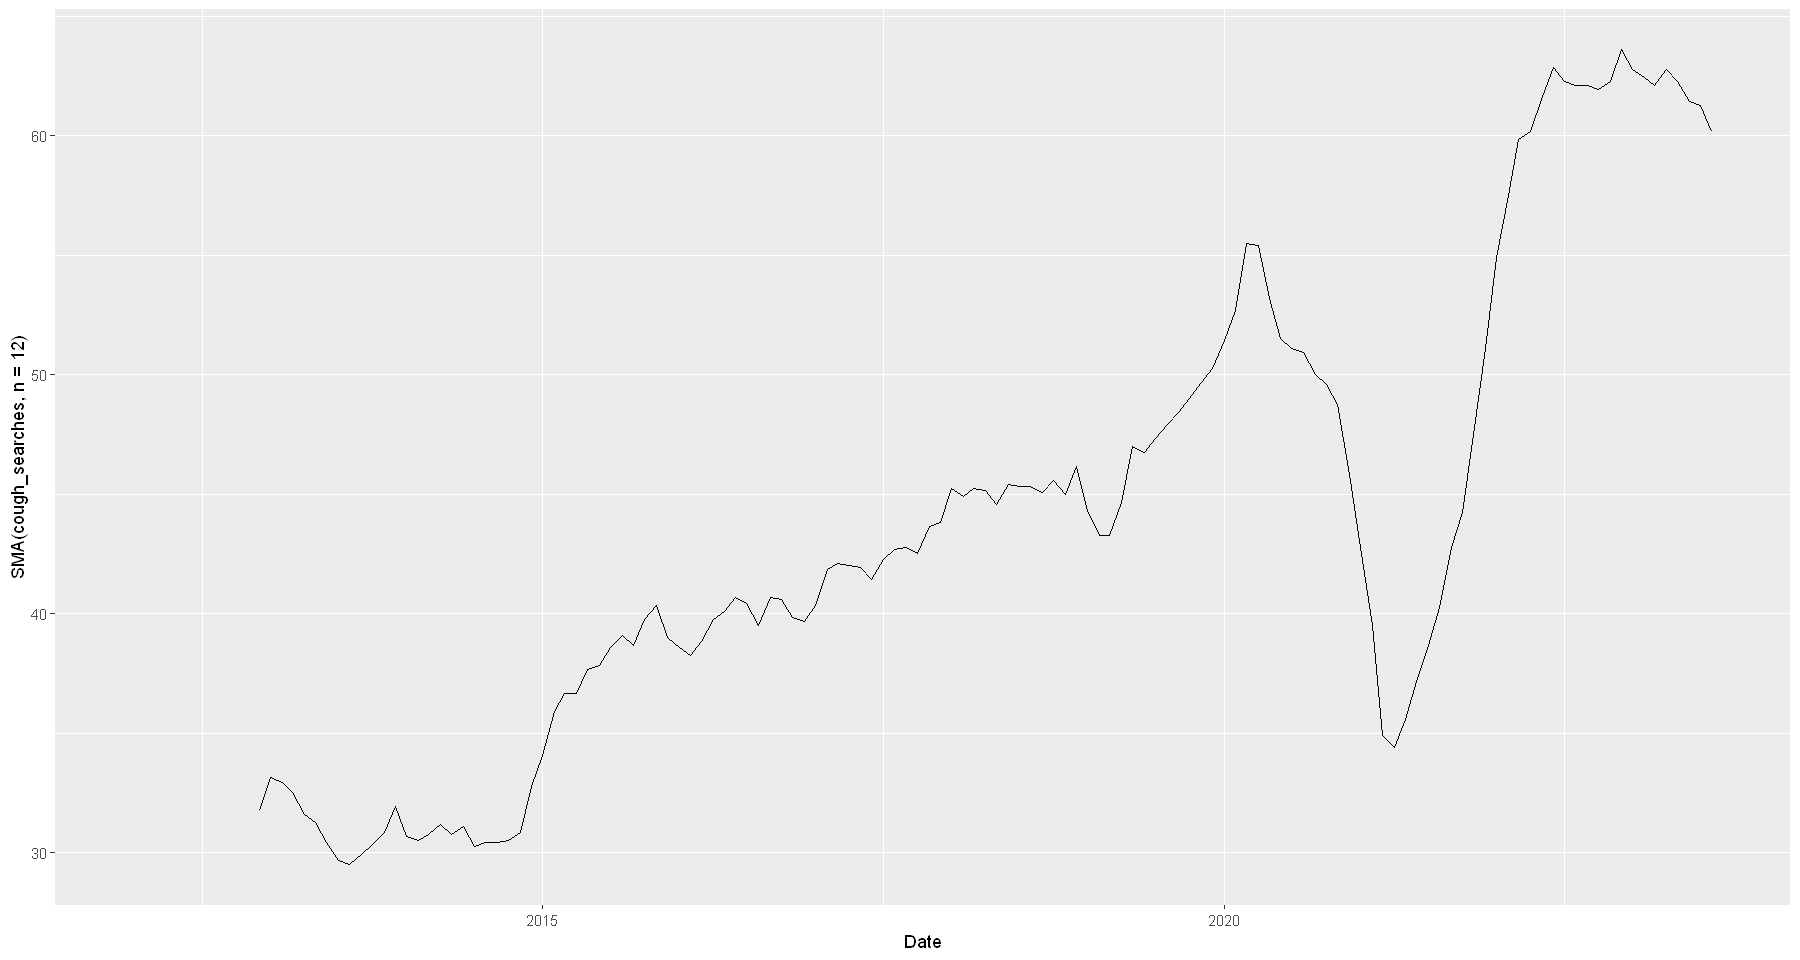

In [38]:
ggplot(d,aes(x=Date,y=SMA(cough_searches,n=12))) + geom_line()

Warning message:
"Removed 11 rows containing missing values (`geom_line()`)."


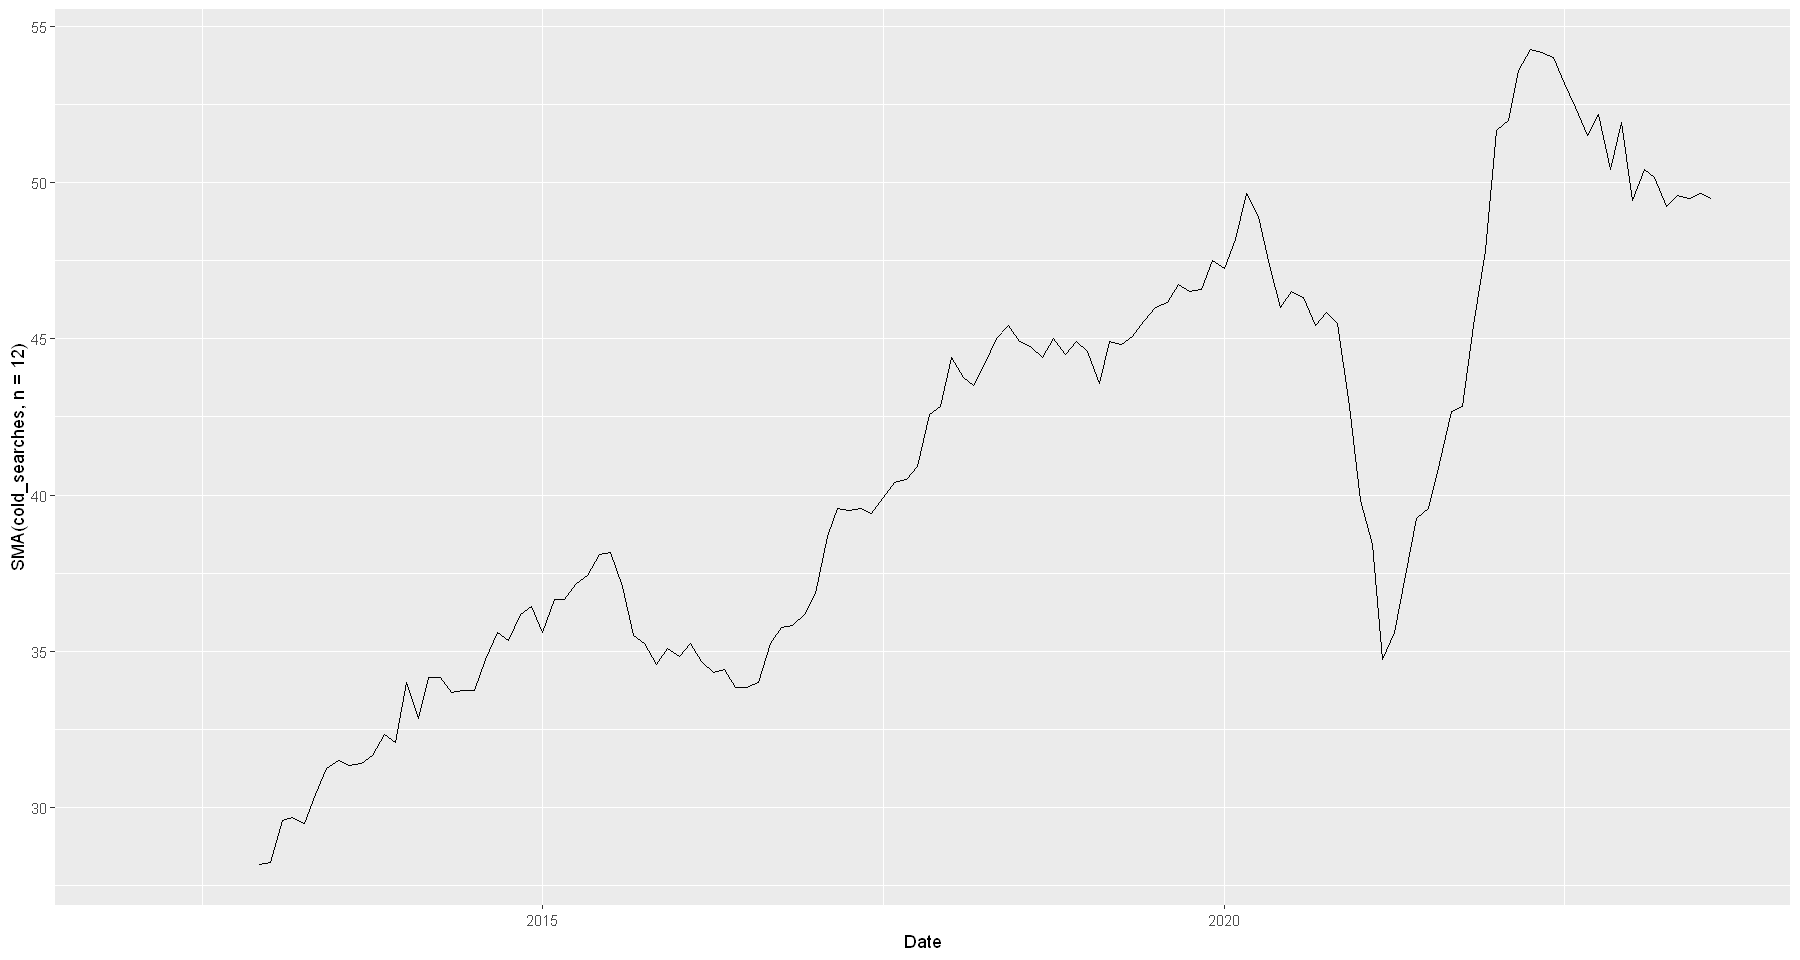

In [39]:
ggplot(d,aes(x=Date,y=SMA(cold_searches,n=12))) + geom_line()

Warning message:
"Removed 11 rows containing missing values (`geom_line()`)."


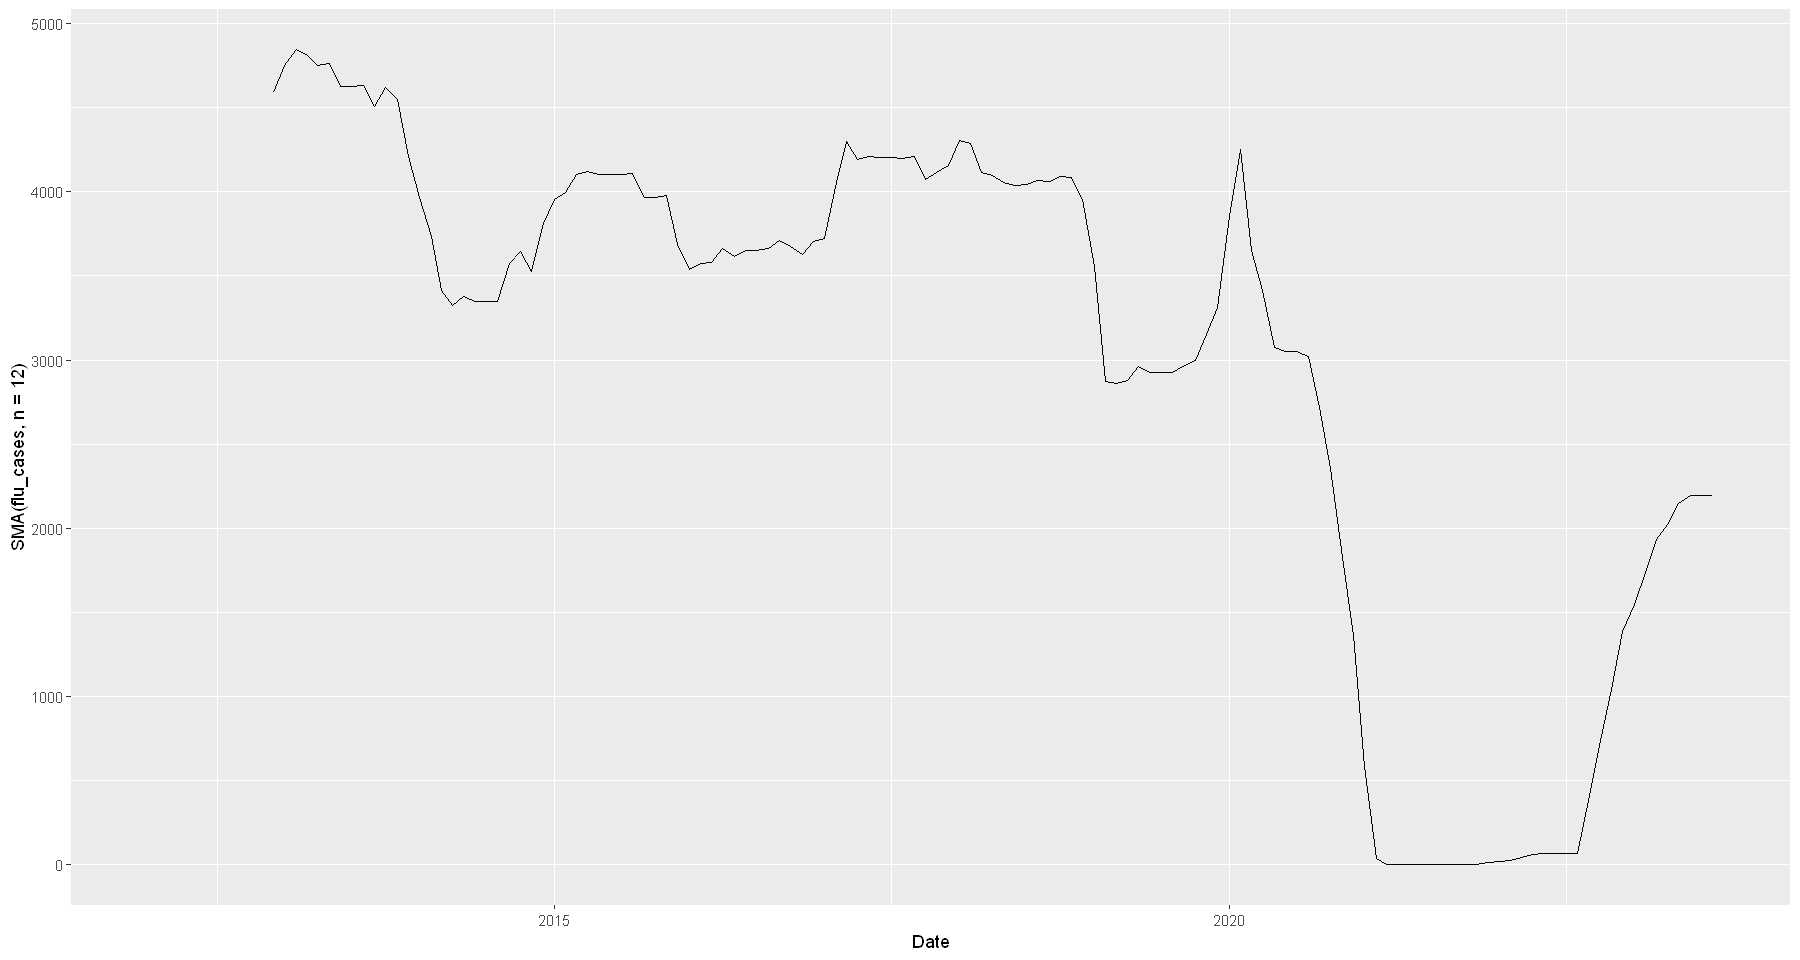

In [40]:
ggplot(d,aes(x=Date,y=SMA(flu_cases,n=12))) + geom_line()

ILI incidence dropped during COVID, and it seems to be impacting the SMA of our data. Let's filter those dates out.

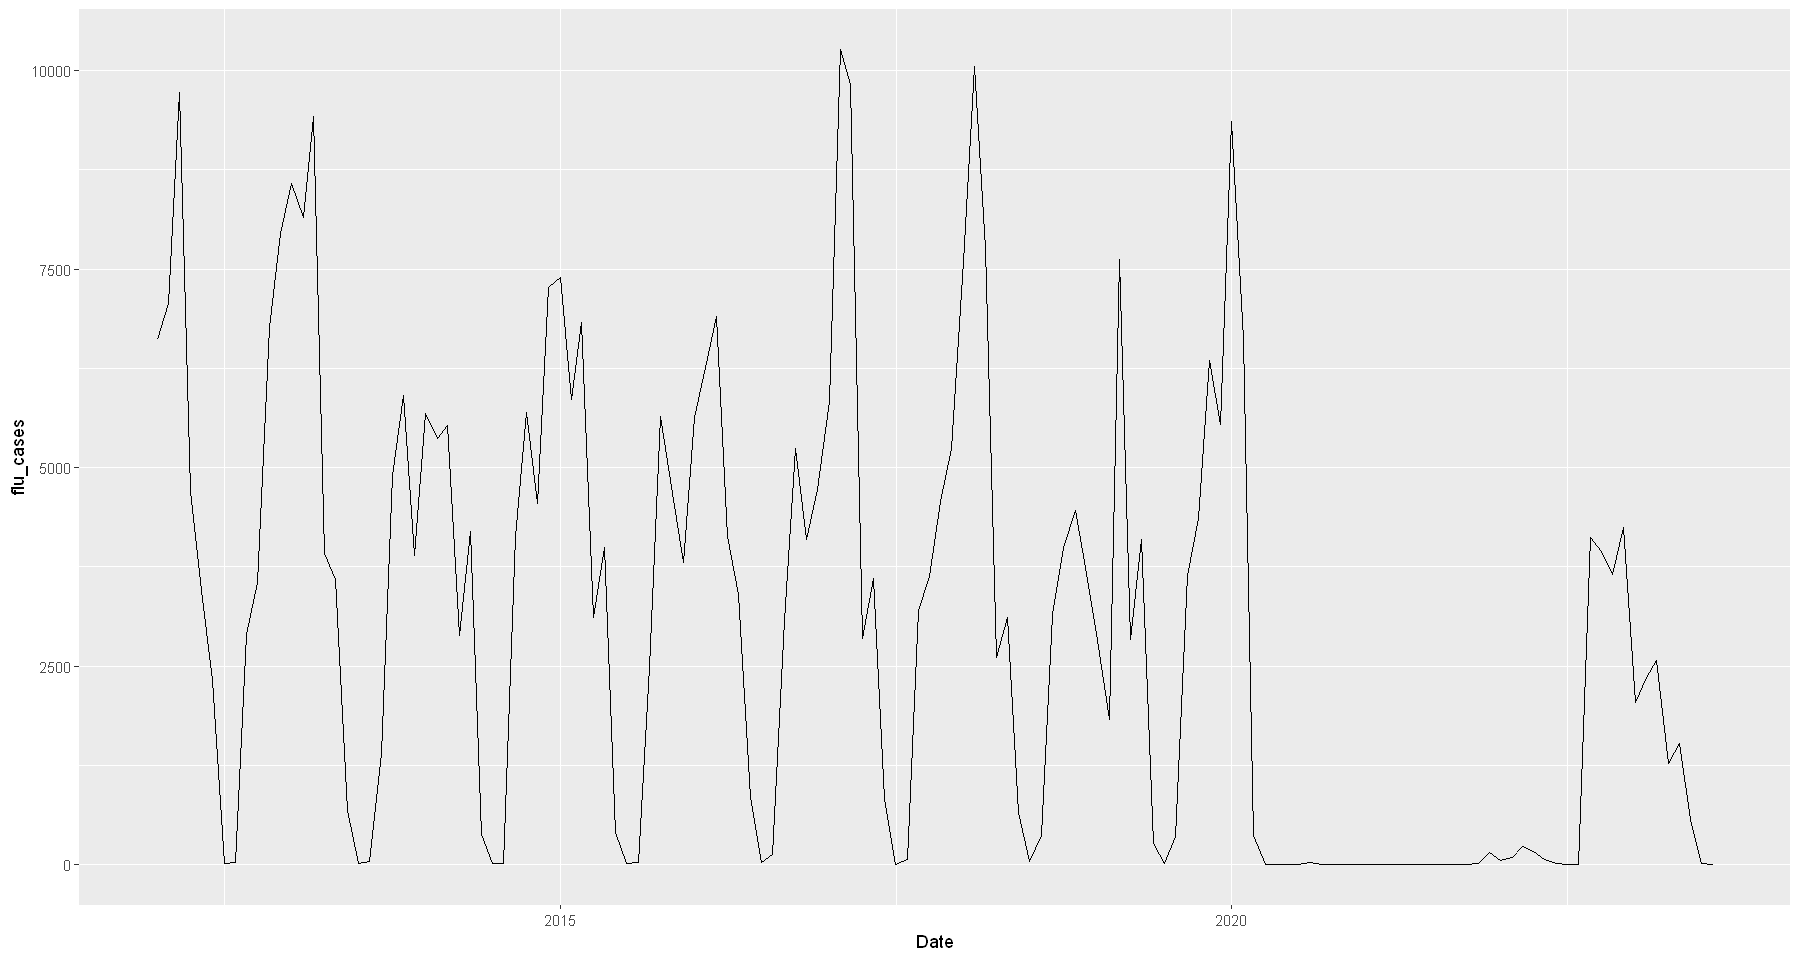

In [41]:
ggplot(d,aes(x=Date,y=flu_cases)) + geom_line()

In [43]:
dd = df |> filter(Date<"2020-01-01")

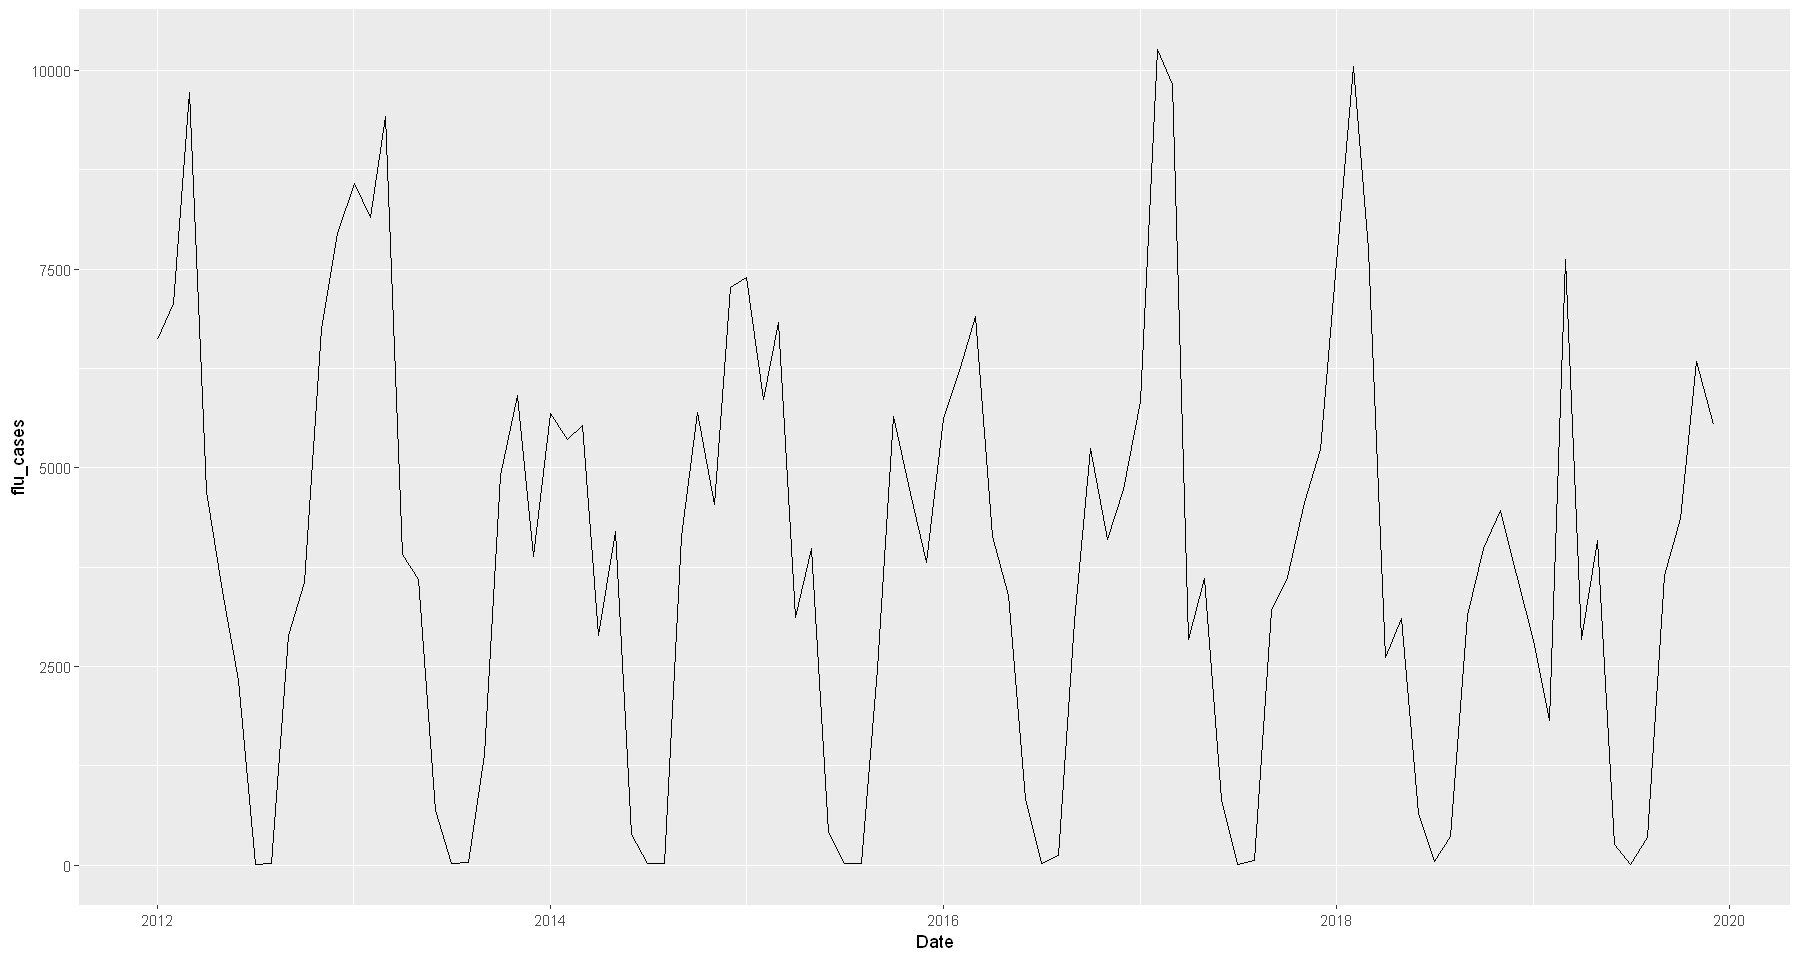

In [44]:
ggplot(dd,aes(x=Date,y=flu_cases)) + geom_line()

Warning message:
"Removed 11 rows containing missing values (`geom_line()`)."


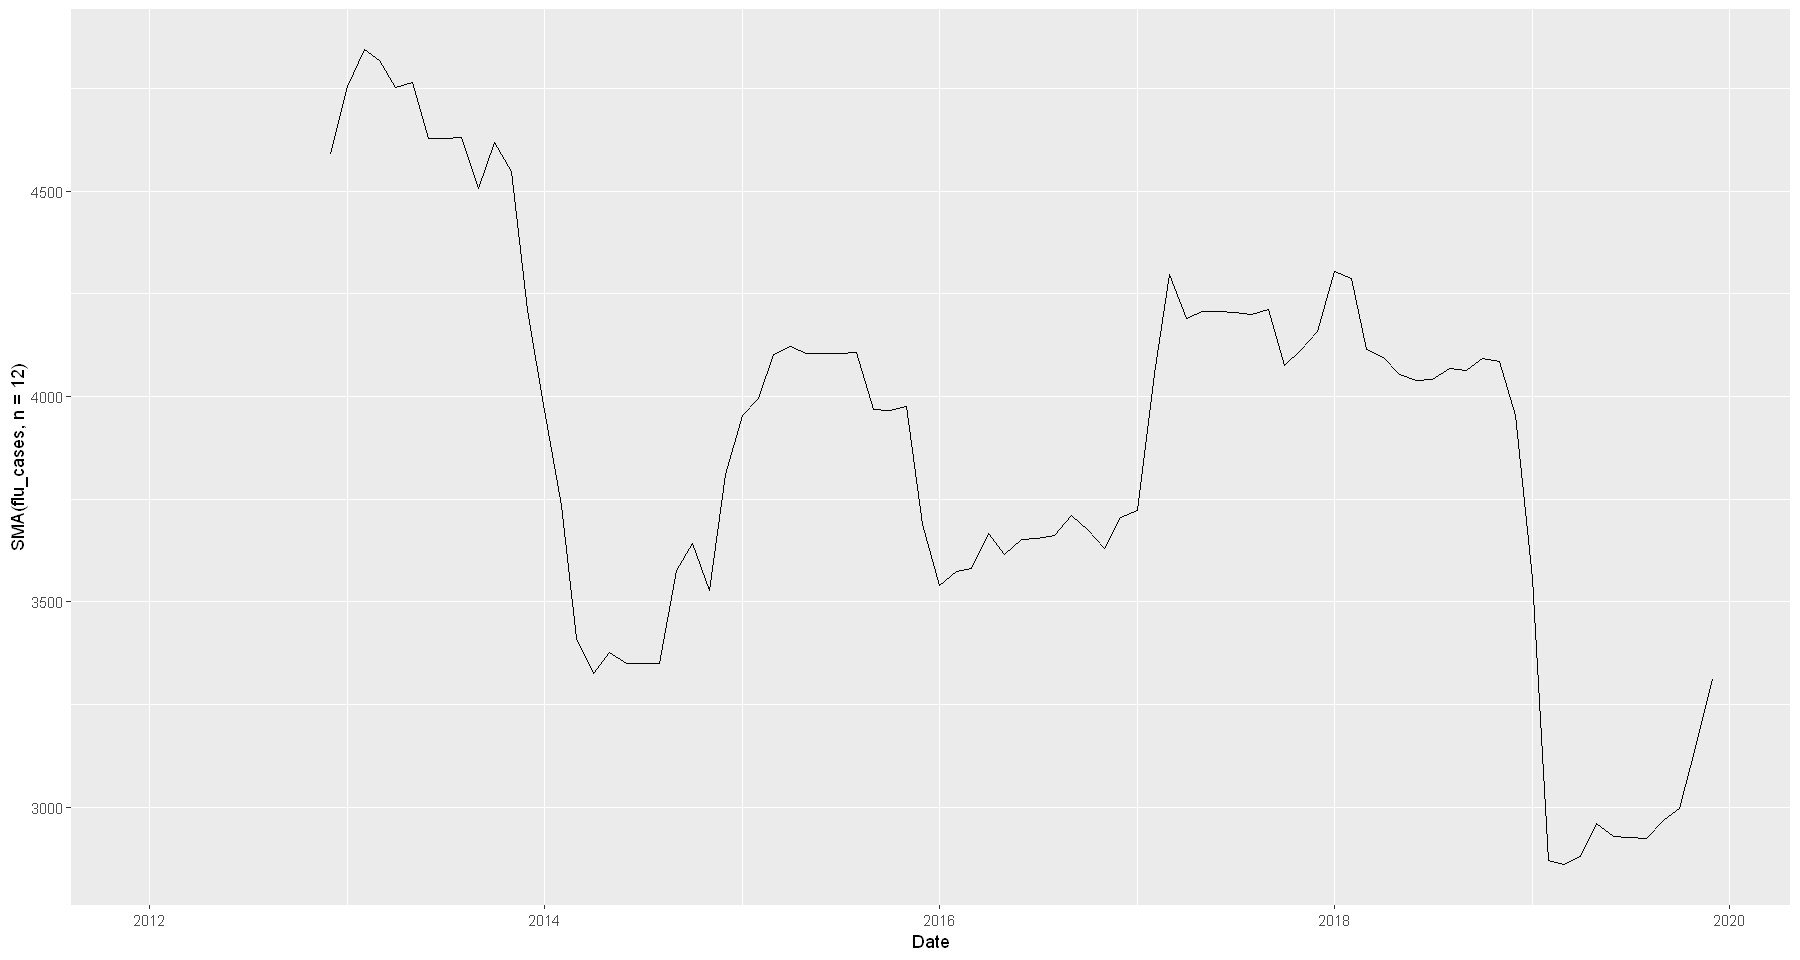

In [45]:
ggplot(dd,aes(x=Date,y=SMA(flu_cases,n=12))) + geom_line()

Warning message:
"Removed 11 rows containing missing values (`geom_line()`)."


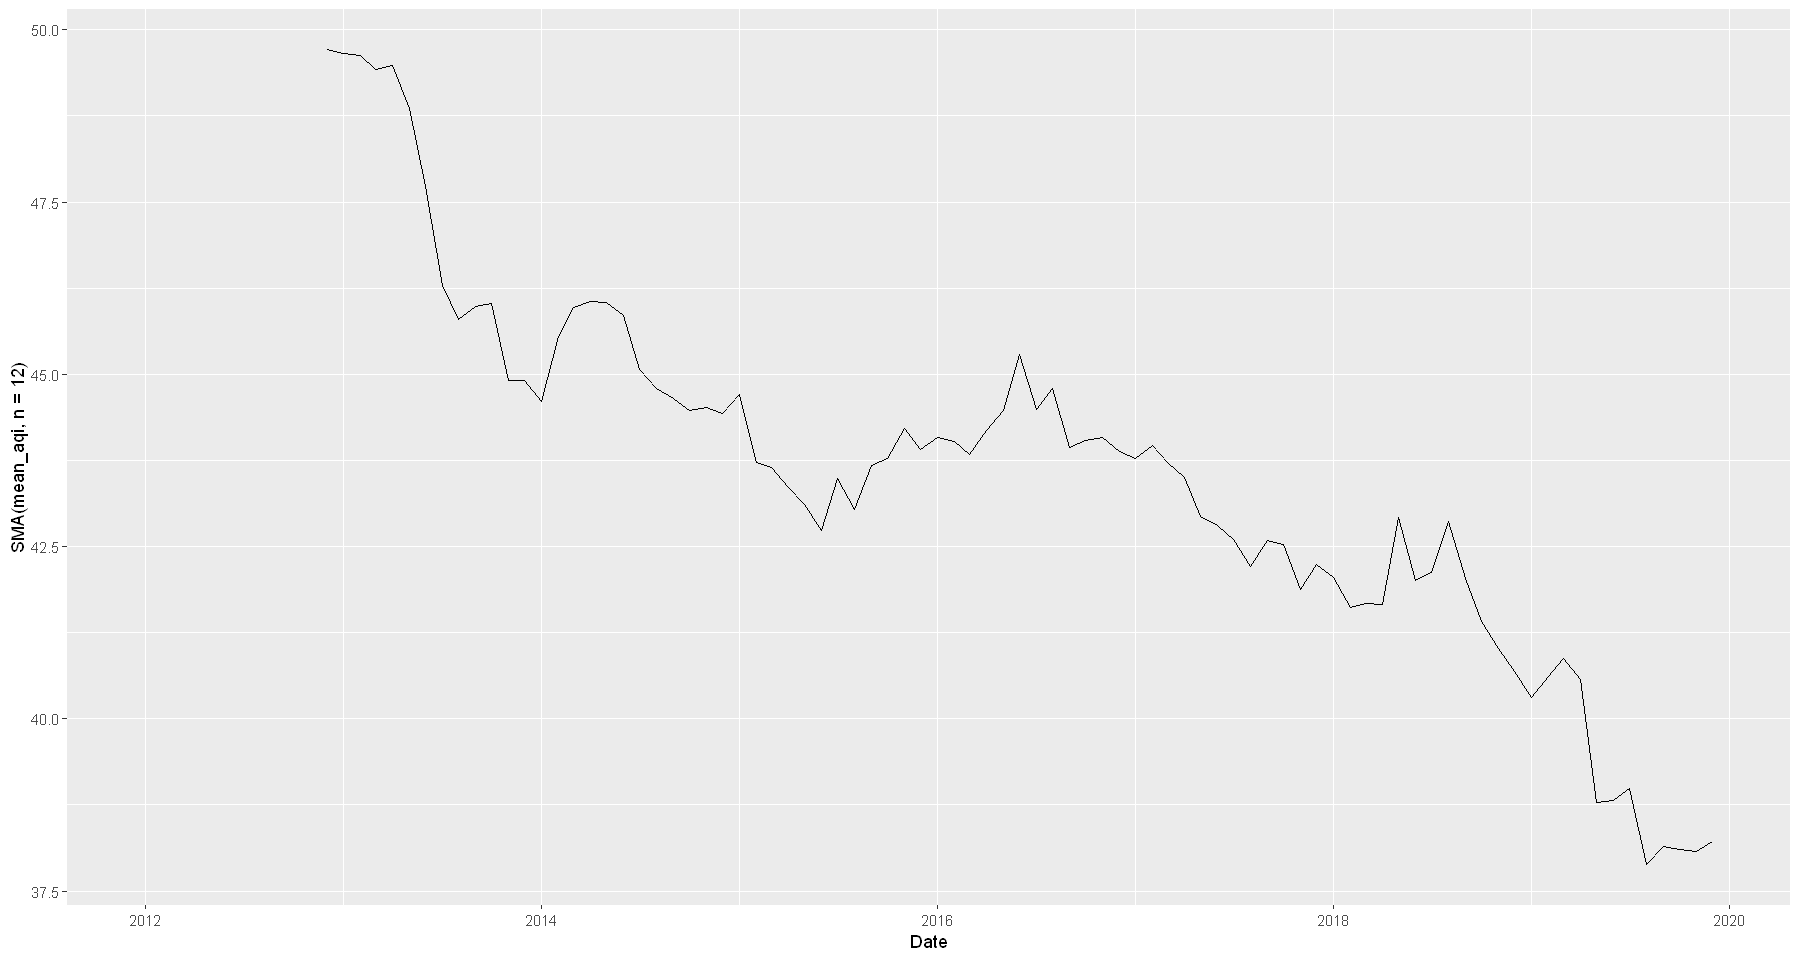

In [46]:
ggplot(dd,aes(x=Date,y=SMA(mean_aqi,n=12))) + geom_line()

Warning message:
"Removed 11 rows containing missing values (`geom_line()`)."


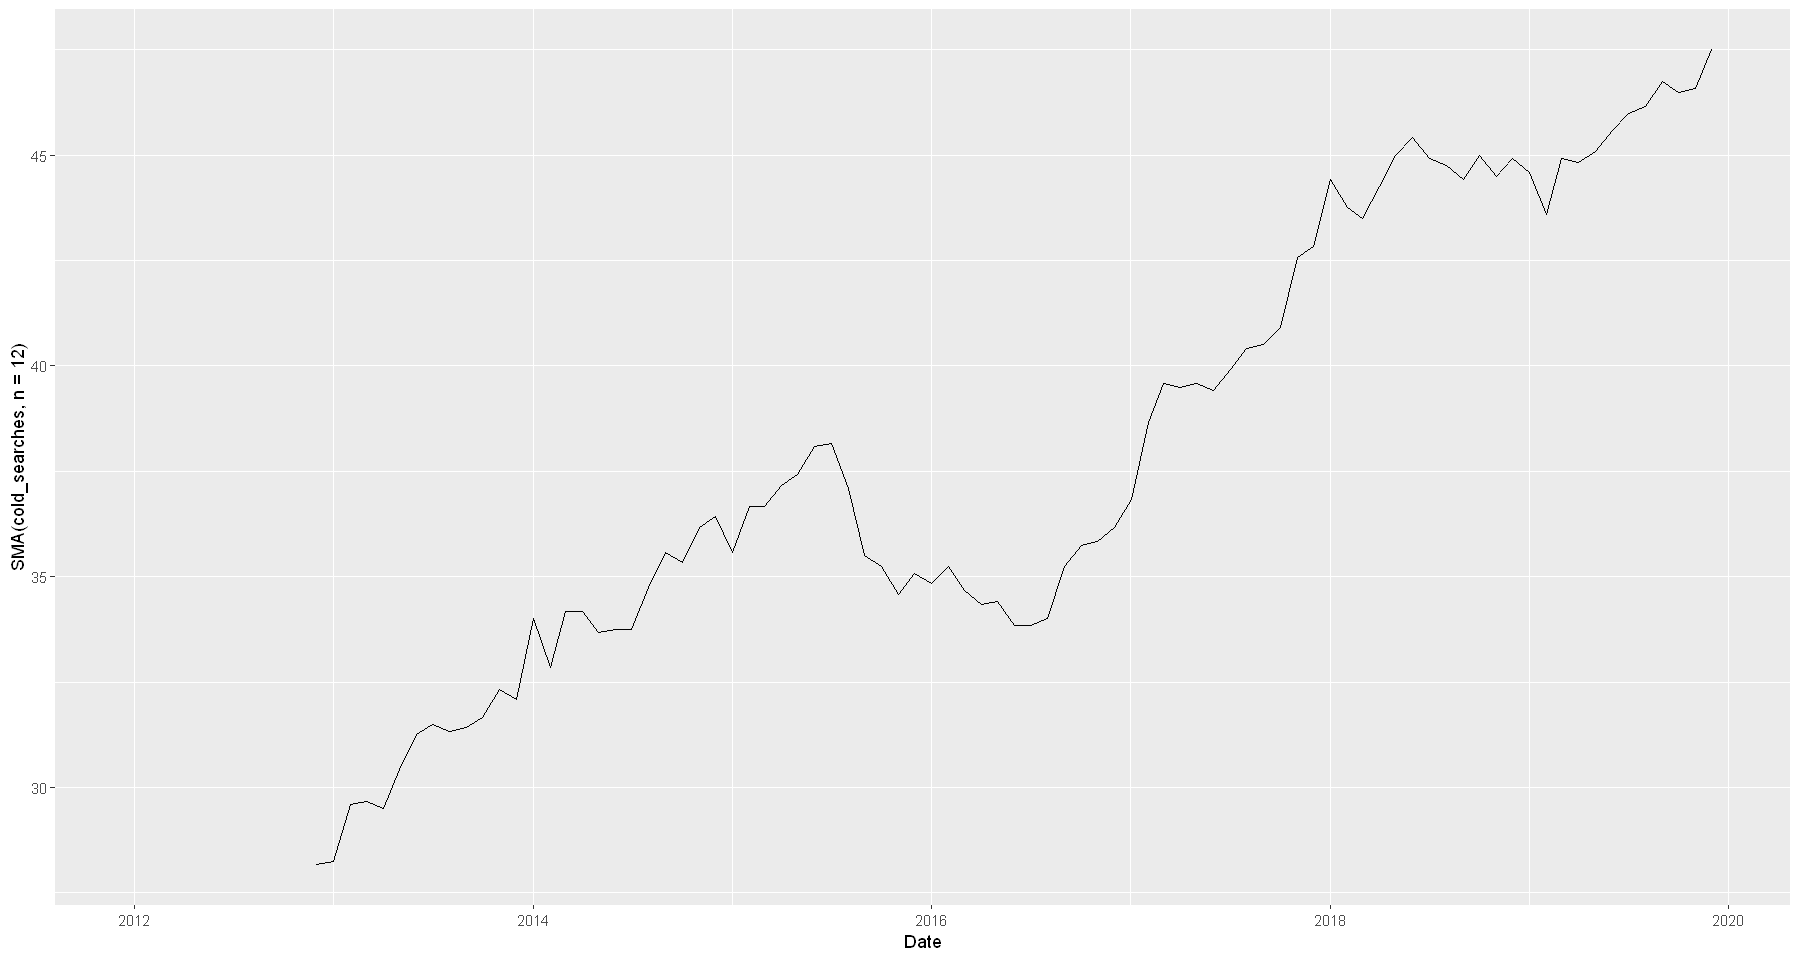

In [47]:
ggplot(dd,aes(x=Date,y=SMA(cold_searches,n=12))) + geom_line()

Warning message:
"Removed 11 rows containing missing values (`geom_line()`)."


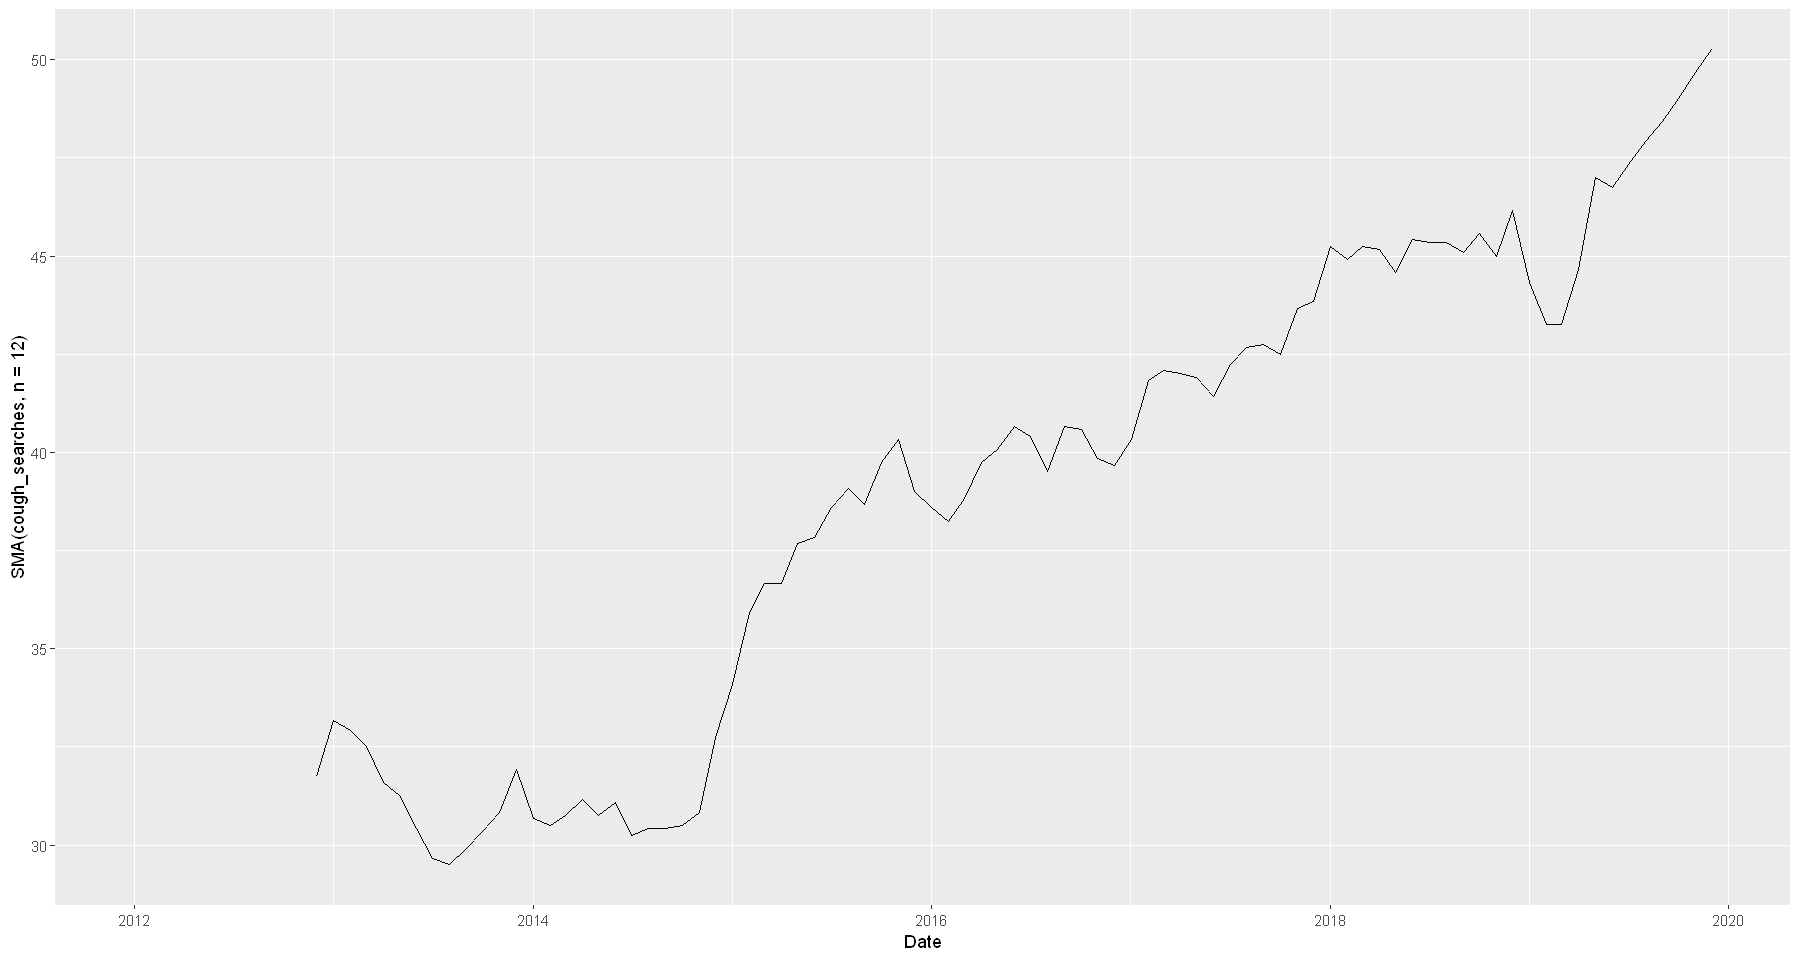

In [48]:
ggplot(dd,aes(x=Date,y=SMA(cough_searches,n=12))) + geom_line()

That looks better, but we can get an even clearer picture of variable trends over time if we decompose each time series

In [67]:
ts_df = ts(dd,frequency = 12,start=c(2012,1))

In [68]:
ts_df[,3]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2012,6609,7066,9728,4698,3449,2323,12,28,2897,3553,6758,7949
2013,8581,8148,9421,3915,3594,685,18,40,1400,4905,5909,3888
2014,5680,5363,5531,2887,4201,384,21,19,4133,5693,4544,7266
2015,7396,5856,6831,3113,3989,407,19,25,2482,5647,4674,3808
2016,5627,6265,6907,4135,3398,843,28,123,3072,5241,4097,4723
2017,5834,10259,9818,2843,3607,826,8,65,3205,3625,4567,5237
2018,7590,10049,7753,2612,3107,651,45,368,3148,3992,4465,3663
2019,2823,1825,7623,2839,4092,262,13,356,3646,4363,6344,5544


In [69]:
ts_df_decomp = decompose(ts_df)

Now we plot each variable's decomposition. The 'seasonal' plot covers seasonal trends, the 'random' plot covers random variance, and the 'trend' plot is where we see the really juicy data.

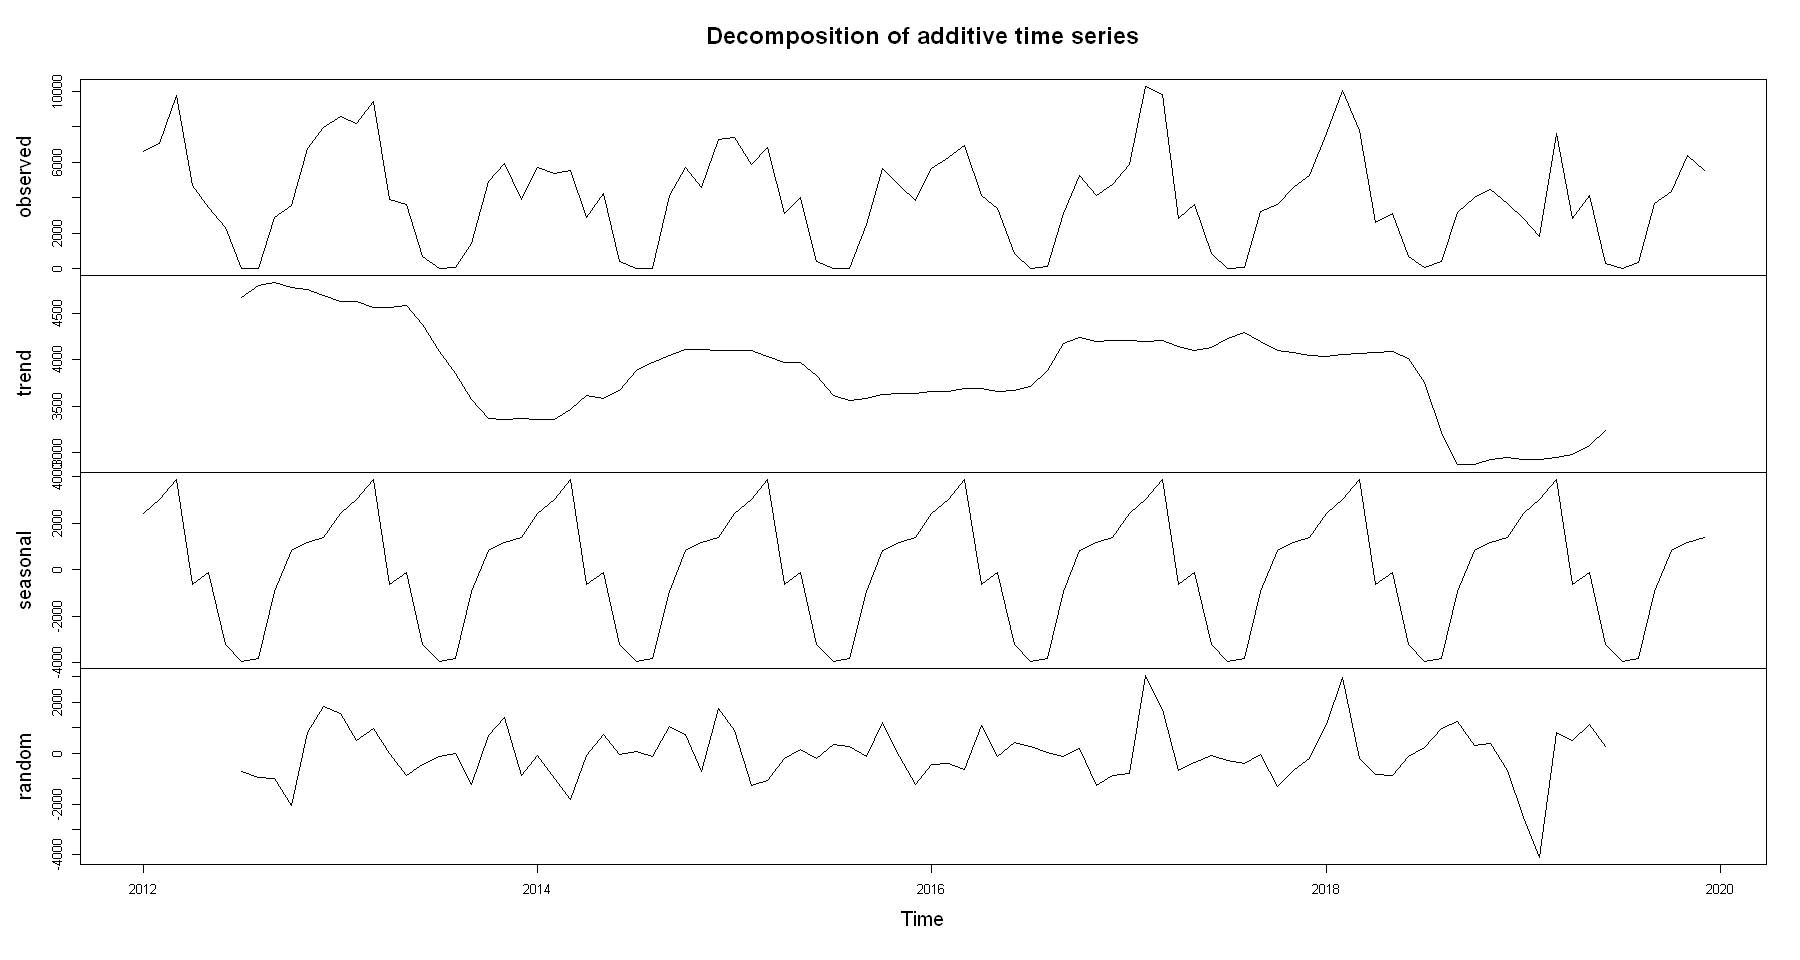

In [85]:
plot(decompose(ts(dd['flu_cases'],frequency = 12,start=c(2012,1))))

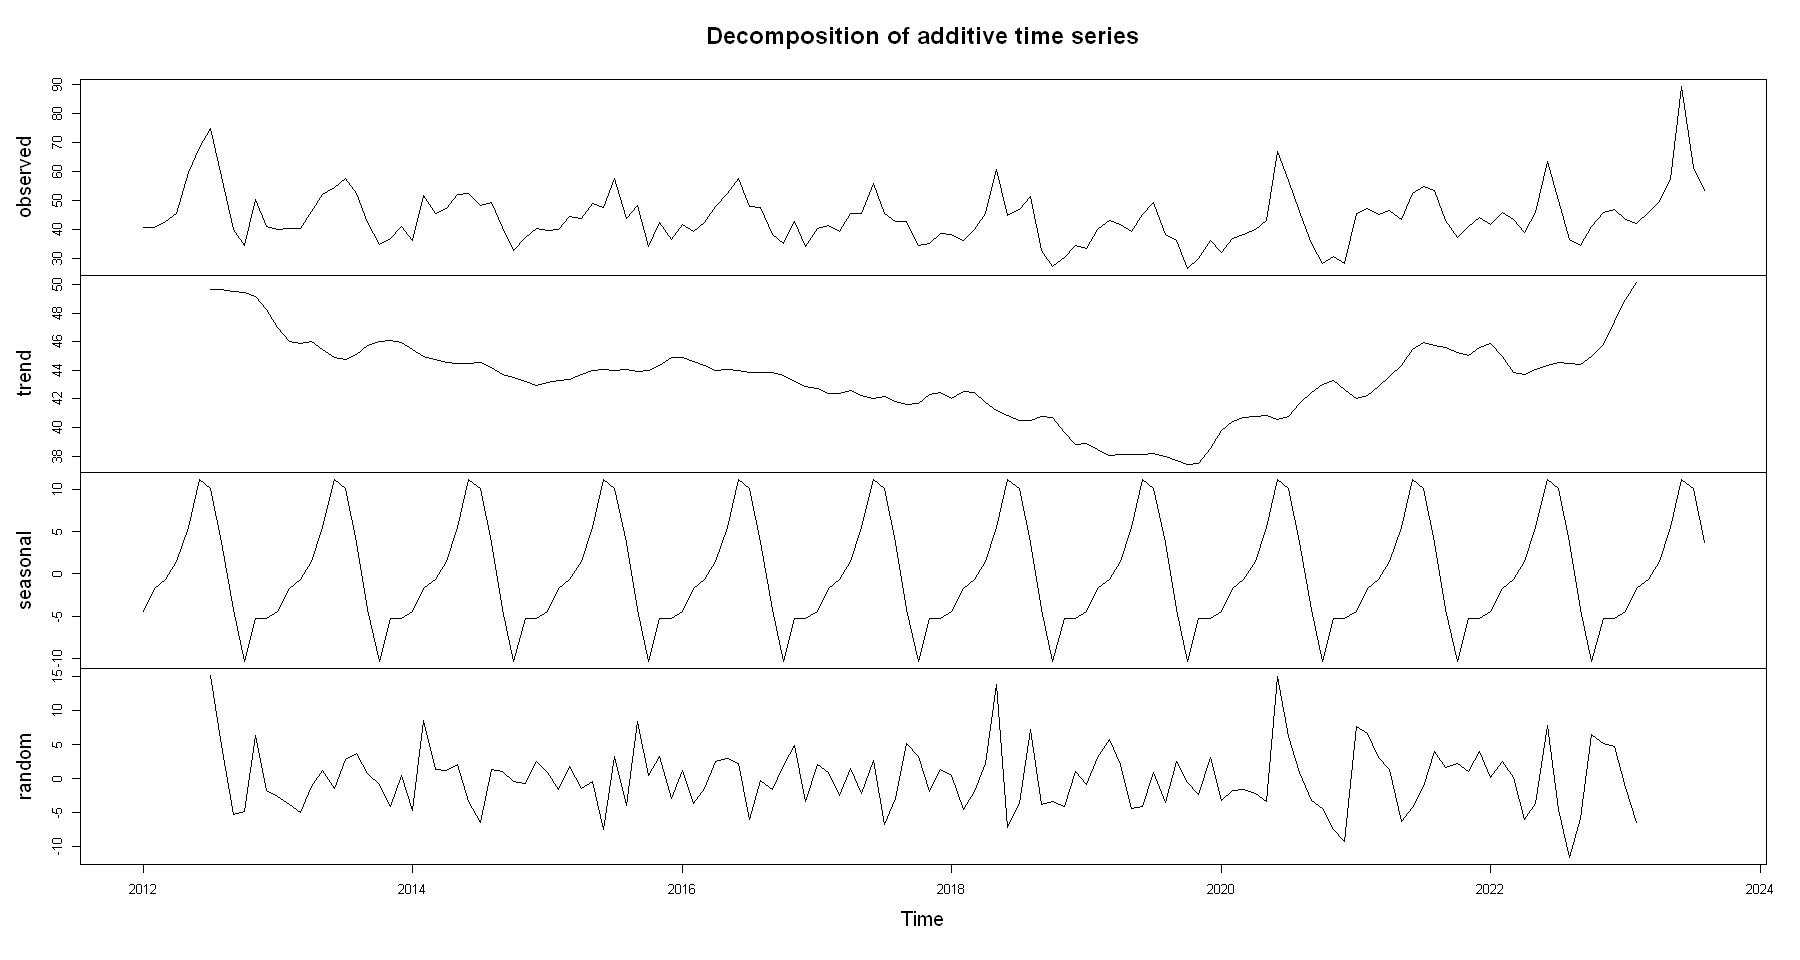

In [87]:
plot(decompose(ts(d['mean_aqi'],frequency = 12,start=c(2012,1))))

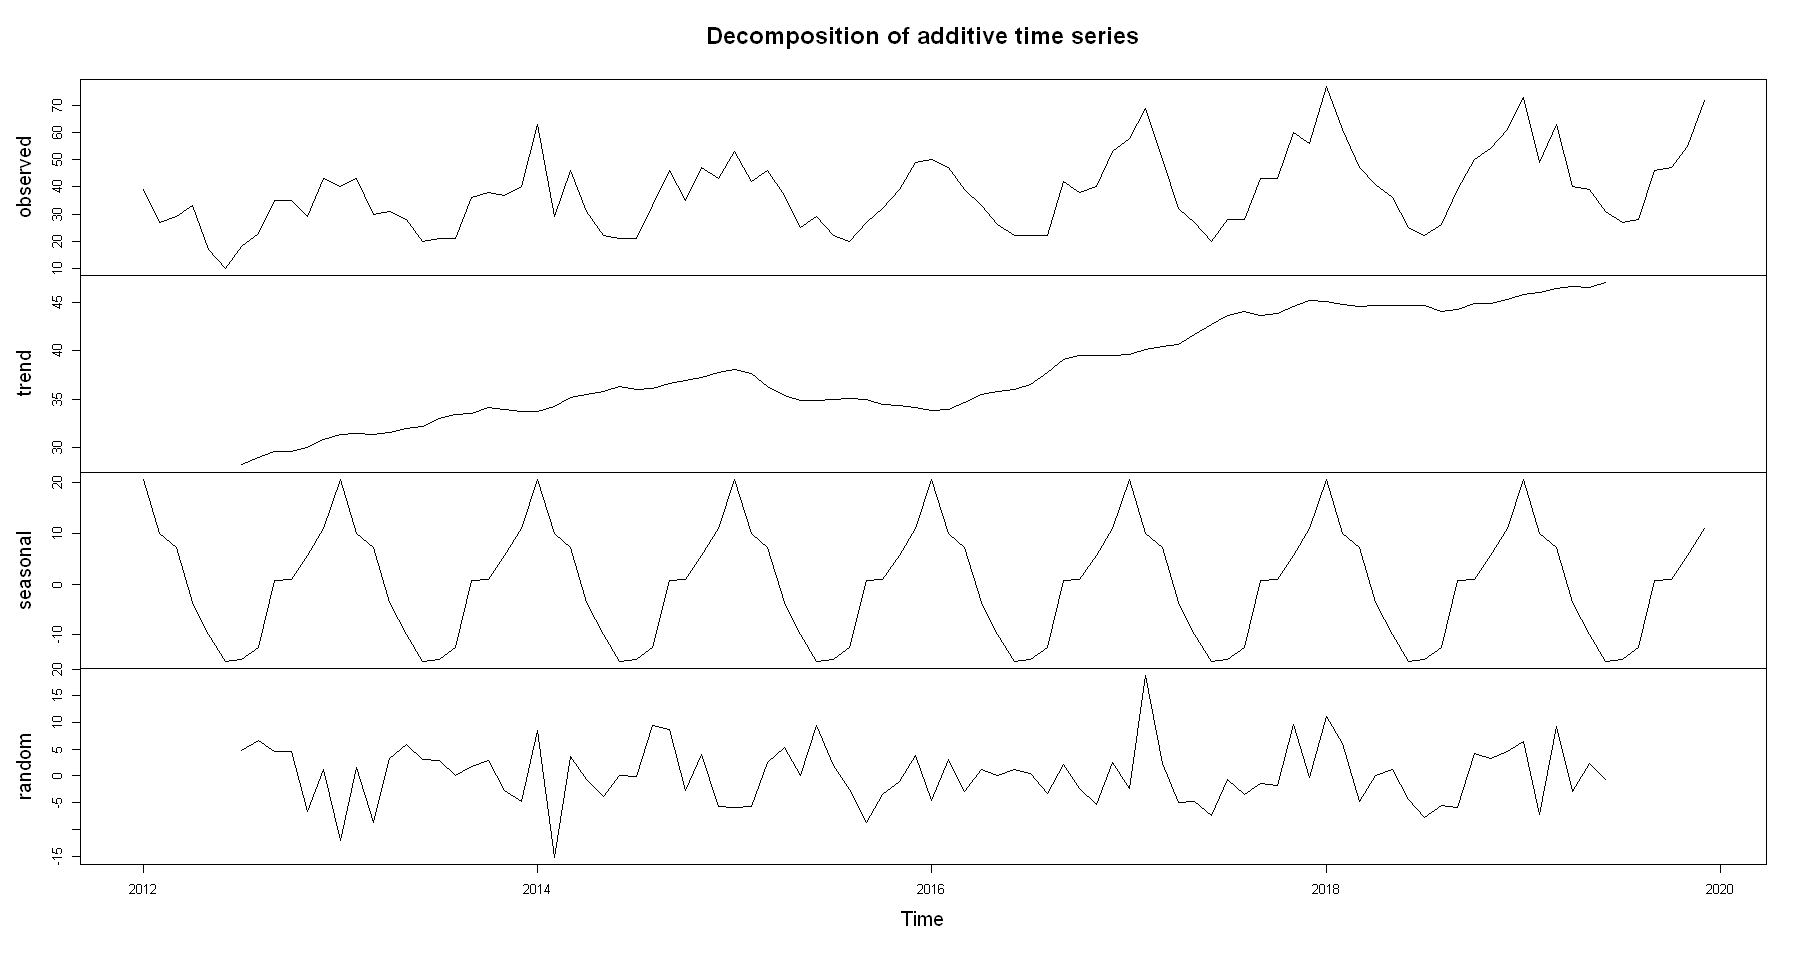

In [88]:
plot(decompose(ts(dd['cold_searches'],frequency = 12,start=c(2012,1))))

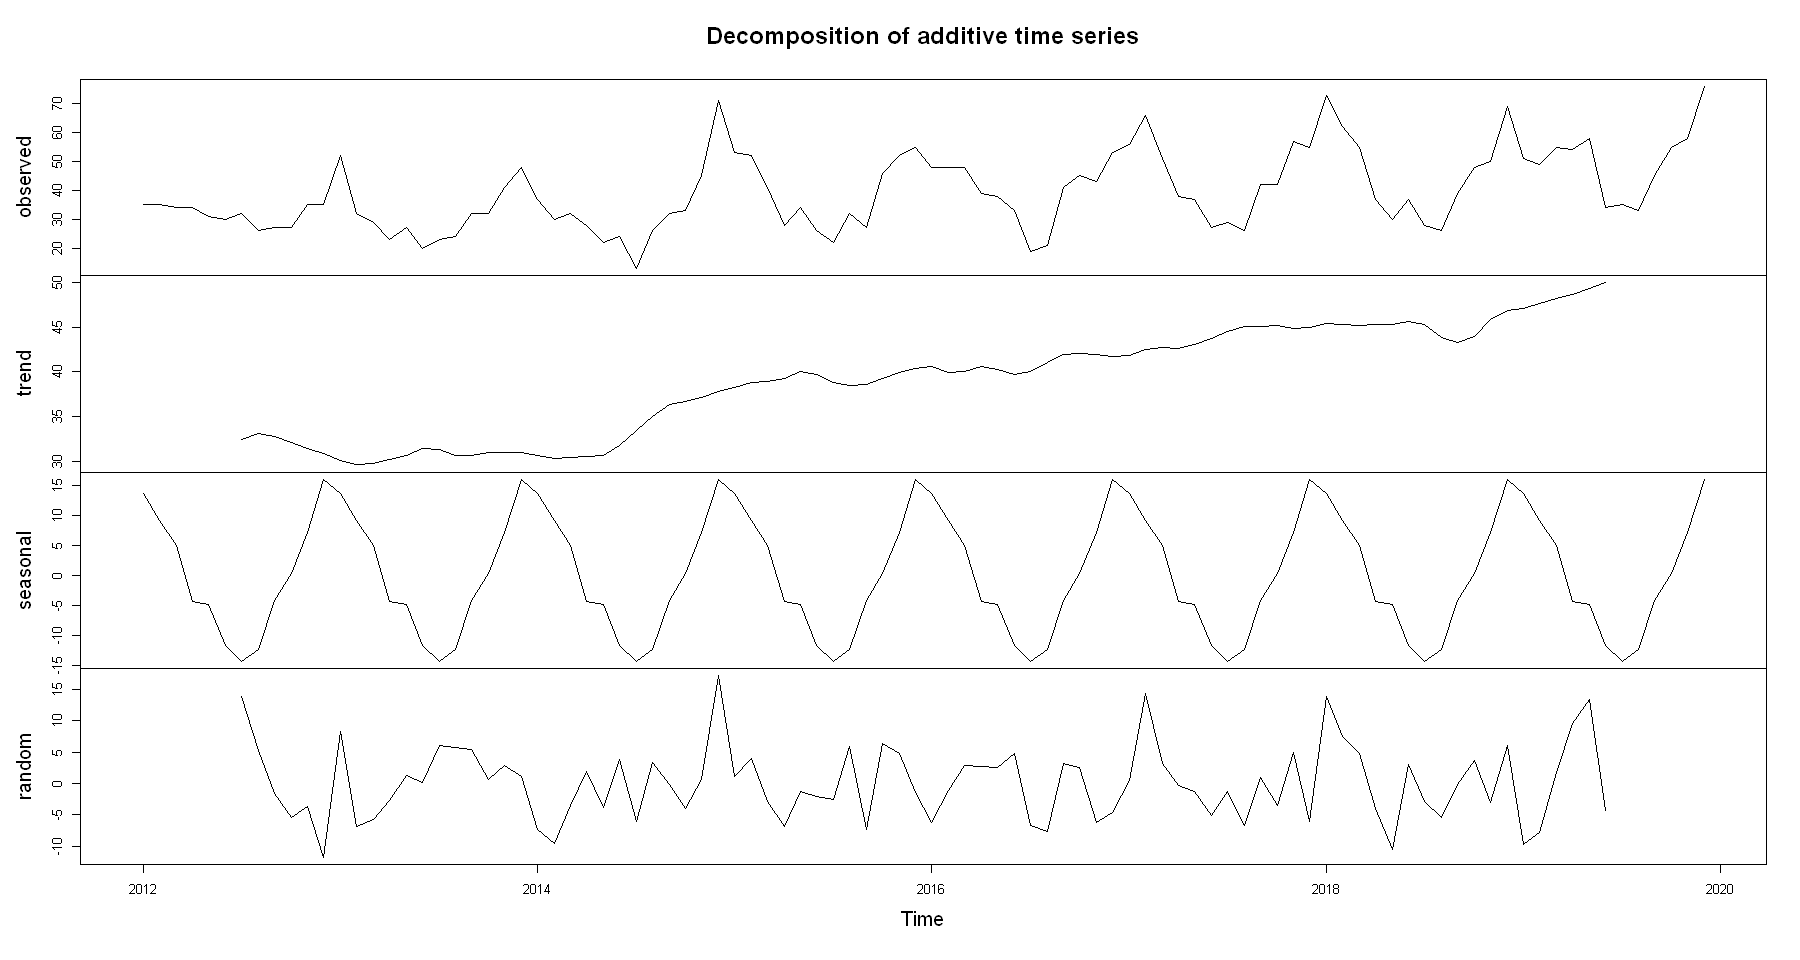

In [89]:
plot(decompose(ts(dd['cough_searches'],frequency = 12,start=c(2012,1))))

We should not be surprised to see overall positive trends for google searches, generally speaking, due to the increasing use of internet over the past ten years. 

ILI incidence seems to be trending downward, but it's not immediately clear looking at the graph if that is a true trend, or if the time period is too short.

What I'm finding very interesting is the mean AQI. It seemed like AQI was trending downward until 2020, where it took a sharp turn up. What happened in Kent County in 2020 to make the air quality index in Kent County so much worse??